# **DESAFIO**
# **Preparando o dataset para modelagem de dados**

### Importação das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files

## EXTRAIR
### Inspecionando os dados

In [ ]:
uploaded = files.upload()

In [ ]:
# Lendo o arquivo e armazenanado no dataframe
df = pd.read_csv('data.csv', encoding= 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Verificando os dados do arquivo
df.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,541909.00,541909.00,406829.00
mean,9.55,4.61,15287.69
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


In [ ]:
# Verificando o tamanho do DataFrame
print("Colunas: ", df.shape[1])
print("Linhas: ", df.shape[0])

Colunas:  8
Linhas:  541909


## TRANSFORMAR
### Valores faltantes

In [ ]:
# Verificando a presença e porcentagem de dados ausentes no DataFrame
print('Colunas        % NaN')
(df.isna().sum() / df.shape[0]*100).sort_values(ascending=False).round(2)

Colunas        % NaN


CustomerID     24.93
Description     0.27
InvoiceNo       0.00
StockCode       0.00
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
Country         0.00
dtype: float64

In [ ]:
# Como as análises que iremos fazer, precisam dos dados do ID do cliente e
# não é possivel determinar os IDs faltantes.
# Excluir todos os dados, onde o ID do Cliente é NaN

df.dropna(subset=['CustomerID'], inplace=True)

In [ ]:
# Confirmando que os dados faltantes, foram excluídos do dataframe
print('Colunas        % NaN')
(df.isnull().sum() / df.shape[0]*100).sort_values(ascending=False).round(2)

Colunas        % NaN


InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

### Tipos de dados da coluna

In [ ]:
# Verificando os tipos das colunas
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [ ]:
# Convertendo o tipo das colunas e verificando a alteração
df['CustomerID'] = df['CustomerID'].astype(str)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

### Verificar valores negativos

In [ ]:
# Quantidade zerada ou negativa
df_quantity = df.loc[df['Quantity'] <= 0]
df_quantity.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [ ]:
# Preço unitário zerado ou negativo
df_price = df.loc[df['UnitPrice'] <= 0]
df_price.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom


In [ ]:
# Verificando a quantidade de linhas com valores negativos
print("Linhas (Quantity): ", df_quantity.shape[0])
print("Linhas (Price): ", df_price.shape[0])

Linhas (Quantity):  8905
Linhas (Price):  40


In [ ]:
# Retirando do Dataframe os valores negativos
df = df.loc[(df['UnitPrice'] > 0) & (df['Quantity'] > 0)]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Confirmando que o Dataframe não tem mais os valores negativos
df.loc[(df['Quantity'] <= 0) | (df['UnitPrice'] <= 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


### Linhas duplicadas

In [ ]:
duplicados = df.duplicated()
print('Quantidade de dados duplicados: ', duplicados.sum())

Quantidade de dados duplicados:  5192


In [ ]:
# Removendo os valores duplicados
df.drop_duplicates(inplace = True)

In [ ]:
# verificar o tamanho do DataFrame
duplicados = df.duplicated()
print('Quantidade de dados duplicados: ', duplicados.sum())

Quantidade de dados duplicados:  0


### Tratando outliers

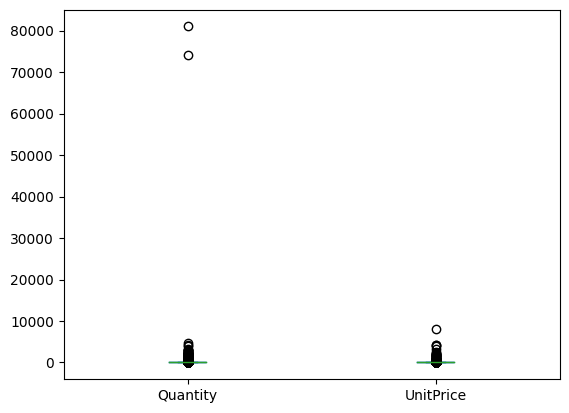

In [ ]:
# Plotando os dados do Dataframe em um boxplot
df.plot.box()
plt.xticks();

In [ ]:
# Verificando os dados de quantidade com valores acima de 10000 unidades
df_quantity = df.loc[df['Quantity'] >= 10000]
df_quantity.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom


In [ ]:
# Verificando os dados de preço unitário com valores acima de 5000 unidades
df_price = df.loc[df['UnitPrice'] >= 5000]
df_price.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom


In [ ]:
# Removendo os dados com valores acima do limite do Dataframe
dados = df.loc[(df['UnitPrice'] < 5000) & (df['Quantity'] < 10000)]

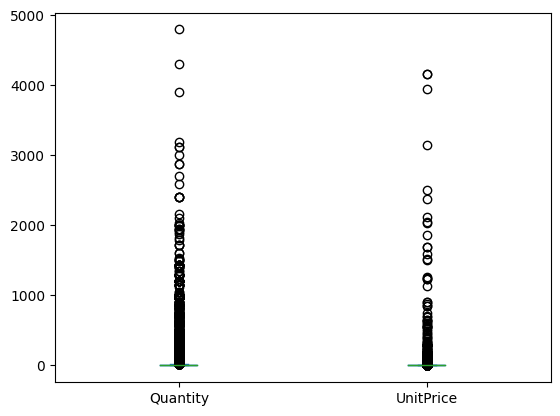

In [ ]:
# Plotando os dados do Dataframe em um boxplot e confirmando a retirada dos dados
dados.plot.box()
plt.xticks();

### Determinando o preço de cada compra

In [ ]:
# Criando uma coluna com os preços de cada compra
dados['Price'] = dados['Quantity'] * dados['UnitPrice']
dados.head()

<ipython-input-24-98f2f6dd3e0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Price'] = dados['Quantity'] * dados['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## VISUALIZANDO
### Data de venda mais recente do Dataframe

In [ ]:
DataMax = max(dados['InvoiceDate'])
print('Data mais recente: ', DataMax)

Data mais recente:  2011-12-09 12:50:00


### Top 10 países com maior valor em vendas

In [ ]:
valor_vendas = pd.pivot_table(
    dados,index=['Country'], values = 'Price', aggfunc = 'sum').sort_values(
        ascending = False, by = 'Price')[:10].reset_index()
valor_vendas

,Country,Price
0,United Kingdom,7031228.694
1,Netherlands,285446.340
2,EIRE,265262.460
3,Germany,228678.400
4,France,208934.310
5,Australia,138453.810
6,Spain,61558.560
7,Switzerland,56443.950
8,Belgium,41196.340
9,Sweden,38367.830


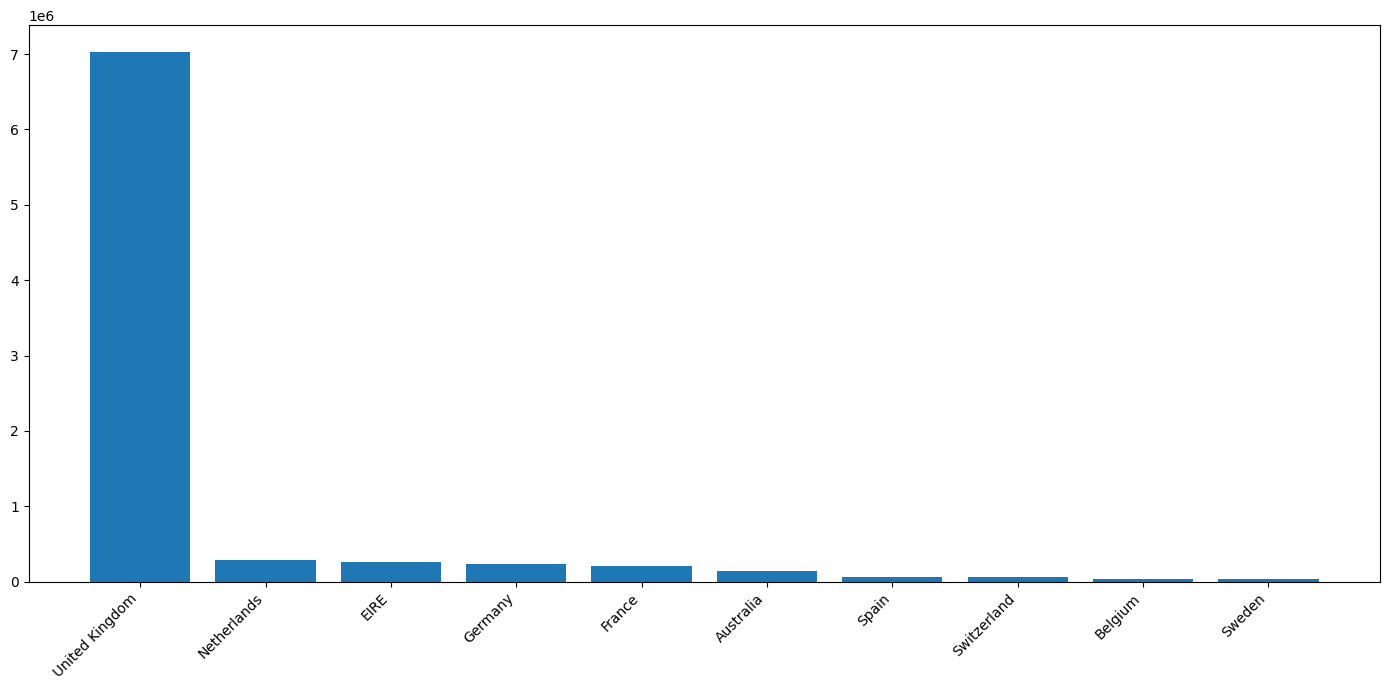

In [ ]:
# Plotagem do gráfico
plt.figure(figsize = (14,7))
plt.bar(valor_vendas['Country'], valor_vendas['Price'])
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

### Top 10 produtos mais vendidos

In [ ]:
venda_produtos = pd.pivot_table(
    dados, index = ['Description'], values = 'Quantity', aggfunc = 'sum').sort_values(
        ascending = False, by = 'Quantity')[:10].reset_index()
venda_produtos

,Description,Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
1,JUMBO BAG RED RETROSPOT,46078
2,WHITE HANGING HEART T-LIGHT HOLDER,36706
3,ASSORTED COLOUR BIRD ORNAMENT,35263
4,PACK OF 72 RETROSPOT CAKE CASES,33670
5,POPCORN HOLDER,30919
6,RABBIT NIGHT LIGHT,27153
7,MINI PAINT SET VINTAGE,26076
8,PACK OF 12 LONDON TISSUES,25329
9,PACK OF 60 PINK PAISLEY CAKE CASES,24230


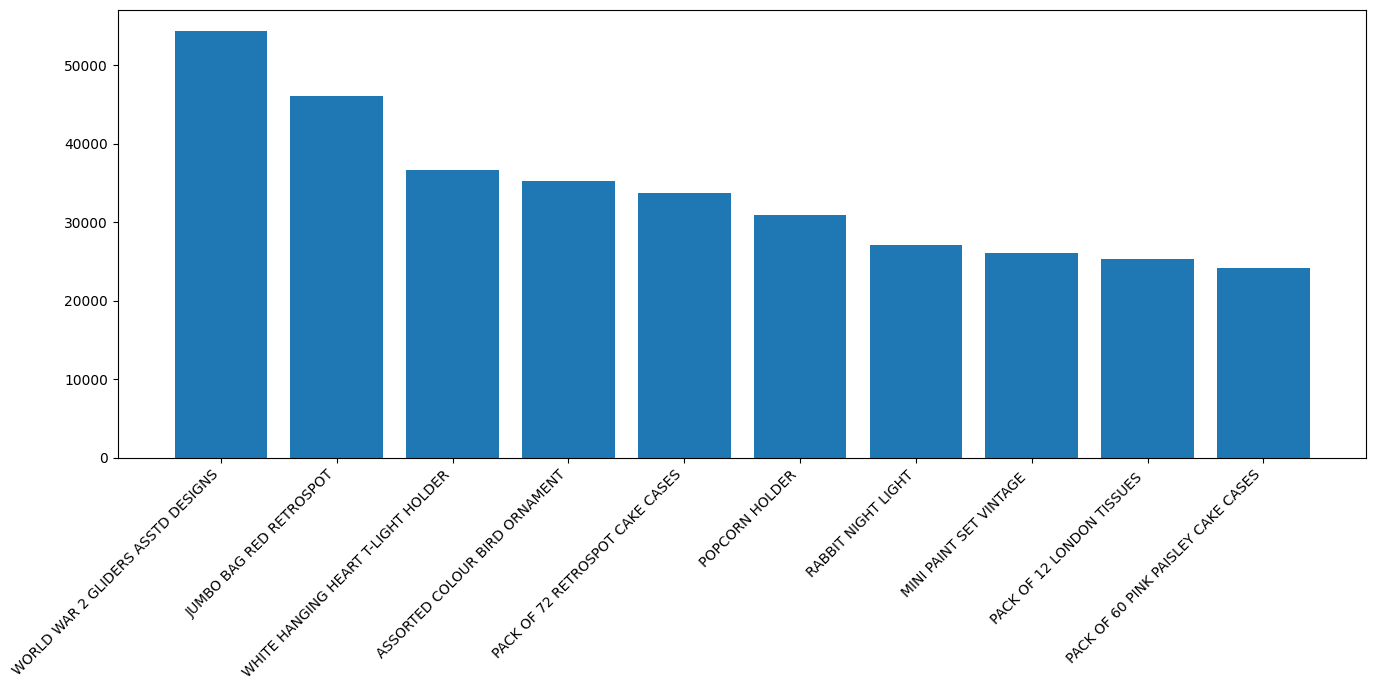

In [ ]:
# Plotagem do gráfico
plt.figure(figsize = (14,7))
plt.bar(venda_produtos['Description'], venda_produtos['Quantity'])
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

### Total de vendas por mês

In [ ]:
vendas_mes = dados.groupby(
    [dados['InvoiceDate'].dt.strftime('%Y-%m')])['Price'].sum().reset_index()
vendas_mes

,InvoiceDate,Price
0,2010-12,570422.730
1,2011-01,490917.710
2,2011-02,446084.920
3,2011-03,594081.760
4,2011-04,468374.331
5,2011-05,669212.400
6,2011-06,660046.050
7,2011-07,598962.901
8,2011-08,644051.040
9,2011-09,950690.202


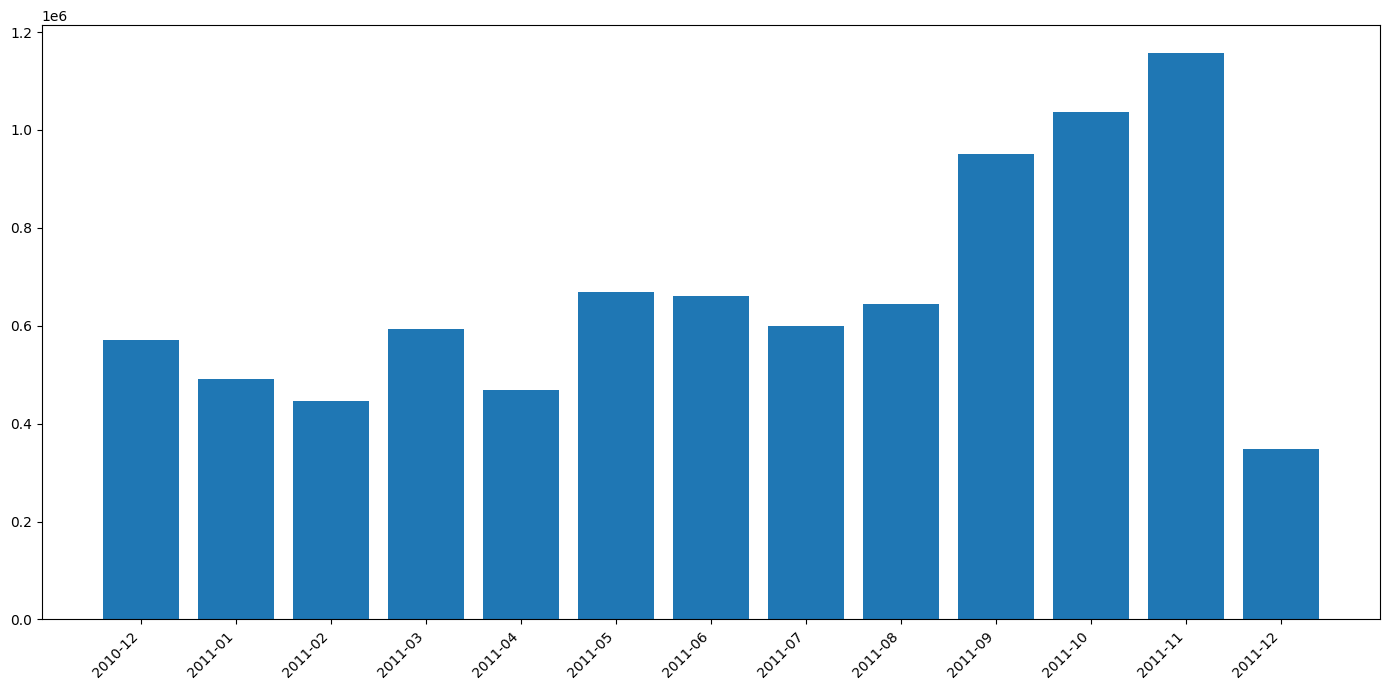

In [ ]:
# Plotagem do gráfico
plt.figure(figsize = (14,7))
plt.bar(vendas_mes['InvoiceDate'], vendas_mes['Price'])
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

### Valor de venda total por mês e por país

In [ ]:
vendas_pais = pd.pivot_table(
    dados, index=['Country', dados['InvoiceDate'].dt.strftime('%Y-%m')],
    values = 'Price', aggfunc='sum').sort_values(
        ascending = False, by = 'Price')[:10].reset_index()
vendas_pais

,Country,InvoiceDate,Price
0,United Kingdom,2011-11,975251.390
1,United Kingdom,2011-10,821220.130
2,United Kingdom,2011-09,794806.692
3,United Kingdom,2011-05,542216.600
4,United Kingdom,2011-06,523775.590
5,United Kingdom,2011-08,497194.910
6,United Kingdom,2010-12,496477.340
7,United Kingdom,2011-07,484545.591
8,United Kingdom,2011-03,465784.190
9,United Kingdom,2011-04,408733.111


In [ ]:
vendas_pais['Country_date'] = vendas_pais['Country'] + ' - ' + vendas_pais['InvoiceDate']
vendas_pais

,Country,InvoiceDate,Price,Country_date
0,United Kingdom,2011-11,975251.390,United Kingdom - 2011-11
1,United Kingdom,2011-10,821220.130,United Kingdom - 2011-10
2,United Kingdom,2011-09,794806.692,United Kingdom - 2011-09
3,United Kingdom,2011-05,542216.600,United Kingdom - 2011-05
4,United Kingdom,2011-06,523775.590,United Kingdom - 2011-06
5,United Kingdom,2011-08,497194.910,United Kingdom - 2011-08
6,United Kingdom,2010-12,496477.340,United Kingdom - 2010-12
7,United Kingdom,2011-07,484545.591,United Kingdom - 2011-07
8,United Kingdom,2011-03,465784.190,United Kingdom - 2011-03
9,United Kingdom,2011-04,408733.111,United Kingdom - 2011-04


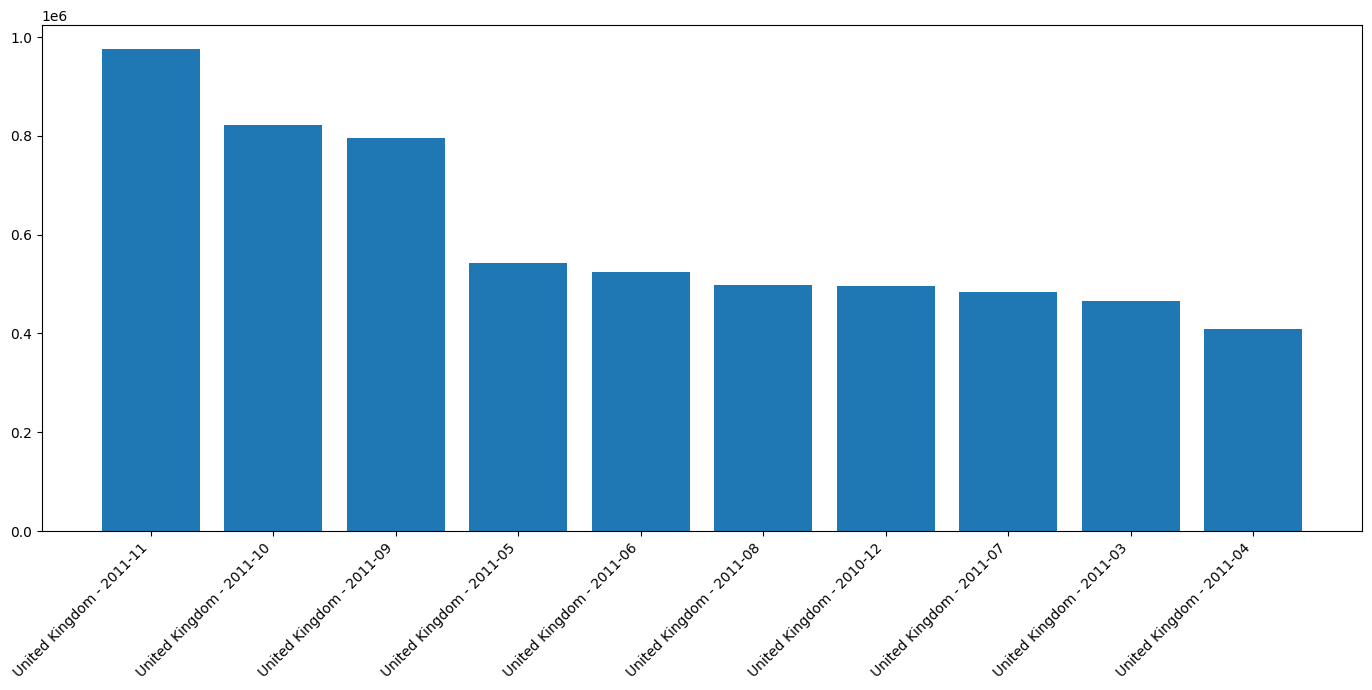

In [ ]:
# Plotagem do gráfico
plt.figure(figsize = (14,7))
plt.bar(vendas_pais['Country_date'] , vendas_pais['Price'])
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

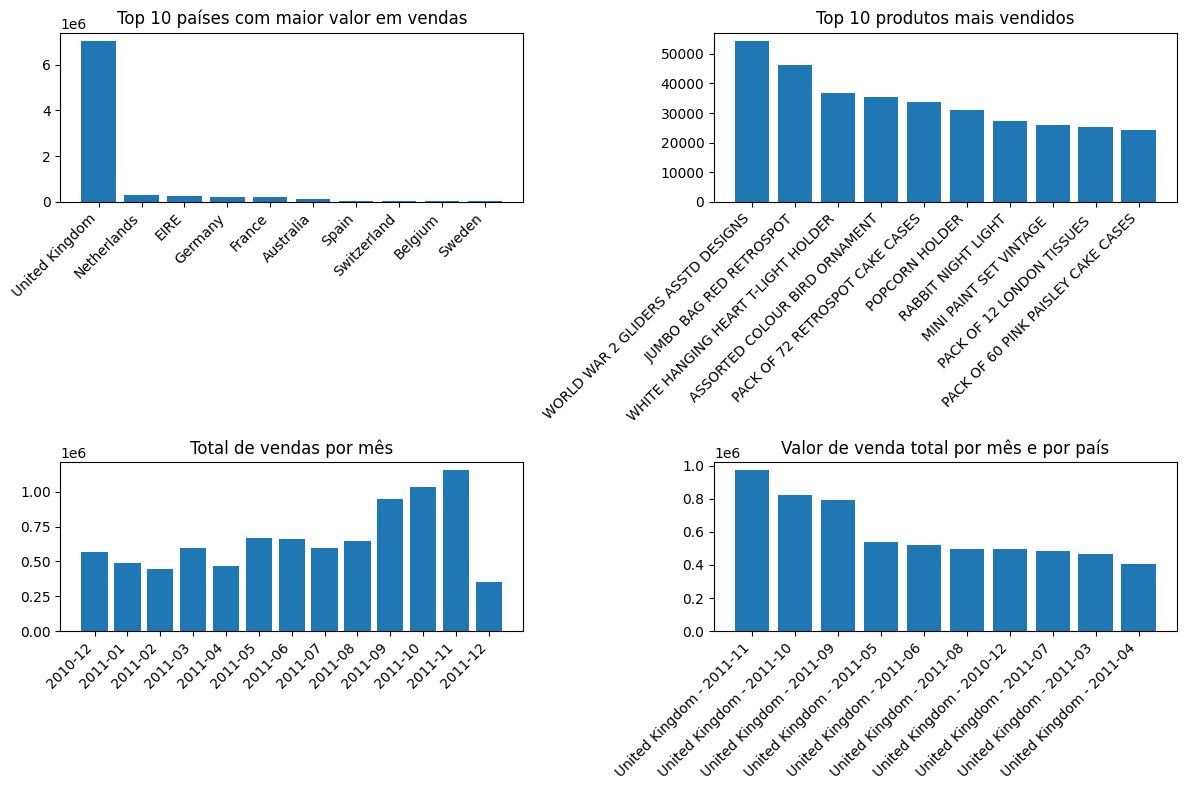

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)  # Subplot 1
plt.bar(valor_vendas['Country'], valor_vendas['Price'])
plt.title('Top 10 países com maior valor em vendas')
plt.xticks(rotation = 45, ha = 'right')

plt.subplot(2, 2, 2)  # Subplot 2
plt.bar(venda_produtos['Description'], venda_produtos['Quantity'])
plt.title('Top 10 produtos mais vendidos')
plt.xticks(rotation = 45, ha = 'right')

plt.subplot(2, 2, 3)  # Subplot 3
plt.bar(vendas_mes['InvoiceDate'], vendas_mes['Price'])
plt.title('Total de vendas por mês')
plt.xticks(rotation = 45, ha = 'right')

plt.subplot(2, 2, 4)  # Subplot 4
plt.bar(vendas_pais['Country_date'] , vendas_pais['Price'])
plt.title('Valor de venda total por mês e por país')
plt.xticks(rotation = 45, ha = 'right')

plt.tight_layout()  # Ajusta automaticamente a disposição dos subplots
plt.show()

### Cálculo do RFM

In [ ]:
# Determinando a data da última compra de cada cliente
dados_grupo = dados.groupby(
    ['CustomerID', 'InvoiceNo']).agg({'InvoiceDate': 'min', 'Price': 'sum'}).reset_index()
dados_grupo.head(10)

,CustomerID,InvoiceNo,InvoiceDate,Price
0,12347.0,537626,2010-12-07 14:57:00,711.79
1,12347.0,542237,2011-01-26 14:30:00,475.39
2,12347.0,549222,2011-04-07 10:43:00,636.25
3,12347.0,556201,2011-06-09 13:01:00,382.52
4,12347.0,562032,2011-08-02 08:48:00,584.91
5,12347.0,573511,2011-10-31 12:25:00,1294.32
6,12347.0,581180,2011-12-07 15:52:00,224.82
7,12348.0,539318,2010-12-16 19:09:00,892.80
8,12348.0,541998,2011-01-25 10:42:00,227.44
9,12348.0,548955,2011-04-05 10:47:00,367.00


In [ ]:
# Cálculo da recência
ultima_compra_por_cliente = dados_grupo.groupby('CustomerID')['InvoiceDate'].max().reset_index()
ultima_compra_por_cliente['R'] = (
    DataMax - ultima_compra_por_cliente['InvoiceDate']).dt.days
ultima_compra_por_cliente.head()

,CustomerID,InvoiceDate,R
0,12347.0,2011-12-07 15:52:00,1
1,12348.0,2011-09-25 13:13:00,74
2,12349.0,2011-11-21 09:51:00,18
3,12350.0,2011-02-02 16:01:00,309
4,12352.0,2011-11-03 14:37:00,35


In [ ]:
# Cálculo da frequência
contagem_compras_por_cliente = dados_grupo.groupby(
     ['CustomerID'])['InvoiceDate'].count().reset_index()
contagem_compras_por_cliente.rename(
    columns={'InvoiceDate': 'F'}, inplace=True)
contagem_compras_por_cliente.head(10)

,CustomerID,F
0,12347.0,7
1,12348.0,4
2,12349.0,1
3,12350.0,1
4,12352.0,8
5,12353.0,1
6,12354.0,1
7,12355.0,1
8,12356.0,3
9,12357.0,1


In [ ]:
# Cálculo do ticket médio
media_compras_por_cliente = dados_grupo.groupby(
    'CustomerID')['Price'].mean().reset_index()
media_compras_por_cliente.rename(
    columns={'Price': 'M'}, inplace=True)
media_compras_por_cliente['M'] = media_compras_por_cliente['M'].apply(
    lambda x: 'R$ {:.2f}'.format(x))
media_compras_por_cliente.head()

,CustomerID,M
0,12347.0,R$ 615.71
1,12348.0,R$ 449.31
2,12349.0,R$ 1757.55
3,12350.0,R$ 334.40
4,12352.0,R$ 313.25


In [ ]:
# Montando o Dataframe com os resultados
resultado_df = pd.merge(
    ultima_compra_por_cliente, contagem_compras_por_cliente, on='CustomerID')
resultado_df = pd.merge(
    resultado_df, media_compras_por_cliente, on='CustomerID')
resultado_df = resultado_df.drop(columns=['InvoiceDate'])
resultado_df.head()

,CustomerID,R,F,M
0,12347.0,1,7,R$ 615.71
1,12348.0,74,4,R$ 449.31
2,12349.0,18,1,R$ 1757.55
3,12350.0,309,1,R$ 334.40
4,12352.0,35,8,R$ 313.25


## CARREGAR
### Gerando arquivo CSV

In [ ]:
resultado_df.to_csv('data_RFM.csv', index = False)